# Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Importing the dataset

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/salary_data.csv", sep=";", index_col=0)

# Brief description of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 12182 to 91145
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   income           100000 non-null  float64
 1   age              100000 non-null  int64  
 2   gender           100000 non-null  object 
 3   education_level  99569 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.8+ MB


# Delete missing data

In [4]:
dataC=data.dropna()

# Exploring the dataset

Checking the dimensions of the dataset

In [5]:
dataC.shape #(rows,columns)

(99569, 4)

In [6]:
dataC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99569 entries, 12182 to 91145
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   income           99569 non-null  float64
 1   age              99569 non-null  int64  
 2   gender           99569 non-null  object 
 3   education_level  99569 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.8+ MB


In [7]:
dataC.head()

,income,age,gender,education_level
ID,,,,
12182,86519.608537,45,M,2.0
81213,83085.864980,30,M,2.0
1996,82606.214973,22,M,2.0
9366,81551.229988,36,M,2.0
9733,79593.253224,51,M,1.0


# Visualizations

We can visualize
- How many people of certain age are in the dataset
- How many males and females are?
- Distribution of the education level 

Mixing with income

- Mean of the income according to the genre
- Mean of the income according to the education leve

## One feature

### How many people of certain age are in the dataset

Let's check the range of the values in our data

In [8]:
print(" Maximum age {}\n Minimum age {}".format(dataC["age"].max(),dataC["age"].min()))

 Maximum age 69
 Minimum age 18


Grouping the data by number of people according to their age

In [9]:
groupAge=dataC.groupby(["age"]).size()
groupAge.head()

age
18    2561
19    2556
20    2481
21    2524
22    2559
dtype: int64

Visualizing the data

Text(0, 0.5, 'Number of people')

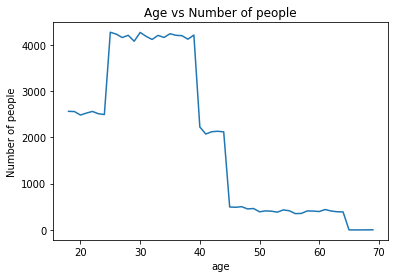

In [10]:
sns.lineplot(data=groupAge)
plt.title("Age vs Number of people")
plt.ylabel("Number of people")

### How many males and females are?

Getting the number of males and females

In [11]:
mfData=dataC.groupby("gender").size()
mfData

gender
F    49785
M    49784
dtype: int64

Text(0.5, 1.0, 'Males and Females in the dataset')

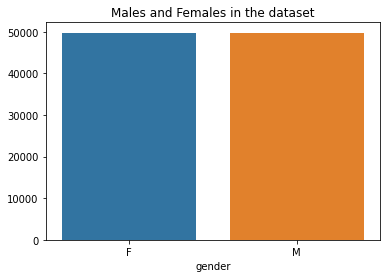

In [12]:
sns.barplot(x=mfData.index,y=mfData)
plt.title("Males and Females in the dataset")

### Distribution of the education level

Getting the number of education levels

In [13]:
edNumber=dataC.groupby("education_level").size()
edNumber.head()

education_level
0.0     7158
1.0    33616
2.0    41969
3.0    16826
dtype: int64

Text(0, 0.5, 'Number of people')

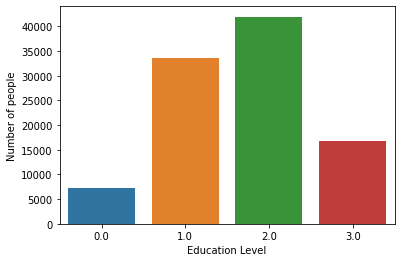

In [14]:
sns.barplot(x=edNumber.index, y=edNumber)
plt.xlabel("Education Level")
plt.ylabel("Number of people")

## Multiple Features

### Mean of the income according to the genre

Let's create a *dataset* which contains the average salary according to the genre

In [15]:
avgIncG={"gender":dataC["gender"].unique()}
s=[]
for i in dataC["gender"].unique():
  s.append(round(dataC.loc[dataC.gender==i]["income"].mean(),3))
avgIncG.update({"avgSal":s})
dataAvg=pd.DataFrame(avgIncG)

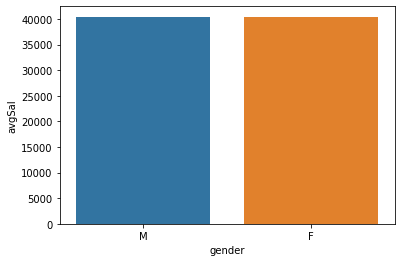

In [16]:
sns.barplot(x=dataAvg.gender,y=dataAvg.avgSal)

### Mean of the income according to the education level

Obener la columna y sólo adjuntar otra

In [20]:
avgEL={"level":dataC["education_level"].unique()}
lel=[]
for i in dataC["education_level"].unique():
  lel.append(round(dataC.loc[dataC.education_level==i]["income"].mean(),3))
avgEL.update({"avgSalEL":lel})
dataAvgEL=pd.DataFrame(avgEL)
dataAvgEL.head()

,level,avgSalEL
0,2.0,40540.069
1,1.0,39369.589
2,3.0,44859.626
3,0.0,34177.745


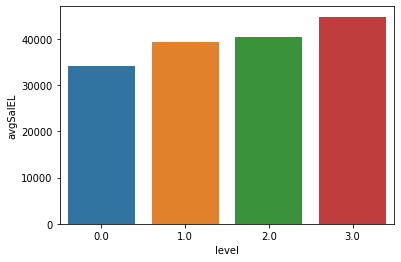

In [22]:
sns.barplot(x=dataAvgEL.level,y=dataAvgEL.avgSalEL)